In [1]:
import numpy as np
from mag_utils.mpoly import mpoly, plot_model
from scipy.constants import mu_0, degree

from simpeg.potential_fields.magnetics.analytics import IDTtoxyz

On the surface of the Earth the background magnetic flux density (B) vector is usually defined by
a inclination, declination, and a strength.

* Inclination is the vertical angle from the horizon, positive downwards into the ground.
* Declination is the horizontal angle from geographic north, positive clockwise (towards the east).
* Stength is the magnitude of the vector.

to obtain the easting, northing, and downward component of this vector you can convert this spherical coordinate vector into cartesian components:

\begin{align}
B_{east} &= B_{total} \cos(Inclination) \sin(Declination)\\
B_{north} &= B_{total} \cos(Inclination) \cos(Declination)\\
B_{down} &= B_{total} sin(Inclination)
\end{align}

In this notebook, you can model 2D polygonal bodies (similar to the gravity 2D notebook).

You will see what the anomlies look like for different shaped dikes, as well as see how the components of the $\vec{B}$ field, and the total field anomaly change with different inducing field directions.

The inducing magnetic field is related to the magnetic flux density using the consitutive relation:

$$
\vec{B} = \mu_0 \vec{H}
$$

And finally, the induced magnetization is related to the inducing magnetic field using susceptibility:

$$
\vec{M} = \chi \vec{H}
$$

In [2]:
# Background B field due to the earth, for example in Golden, CO
B_strength = 51351 #nT
B_inc = 65.975 # degrees
B_dec = 7.776 # degrees Assume our survey is aligned with magnetic north

B = B_strength*np.r_[
    np.cos(B_inc*np.pi/180) * np.sin(B_dec * np.pi/180),
    np.cos(B_inc*np.pi/180) * np.cos(B_dec * np.pi/180),
    np.sin(B_inc*np.pi/180)
]
H = B/mu_0
sus = 0.1
M = sus * H

# In 2D we use components of this vector, We use the two that are in the same
# plane as our profile slice. For this assignment, assume that the profile
# direction is aligned with geographic north, thus we need the North, and Depth
# component of these vectors.
M = [M[1], M[2]]

In [3]:
# build a model of a dike,
# These are the locations of the corners of the polygon, listed clockwise.

dike_v = np.array([
    [-150.0, 100.0],
    [150.0, 100.0],
    [150.0, 1000.0],
    [-150.0, 1000.0]
])

# create our observation locations
# note we could read these locations in from a file
# if we had measured locations. Here we're just going to create
# a line of points from -2500 m to 2500 m with 50 m spacing.
xmin, xmax = -2500, 2500
dx = 50

obs_x = np.linspace(xmin, xmax, (xmax-xmin)//dx + 1)
obs_z = np.zeros_like(obs_x) + 0
obs_dike = np.c_[obs_x, obs_z]
# obs dike is a 2D numpy array with a shape of (n_obs, 2) (the 2 is for profile and z dimensions)

In [4]:
mag_dike_v = mpoly(obs_dike, dike_v, magnetization=M)

# Magnetic Data
There are three columns in the data array returned by the `mpoly` function. The first two columns
are the along profile component and the downward component of the $\vec{B}$ field. The last column
is a value refered to as the Total Field Anomaly. These represent the two types of data we collect with magnetics: vector field measurements, and scalar magnitude measurements.

The total field anomaly is defined as:

$$
B_{TFA} = \vec{B}_a \cdot \hat{B}_0
$$

This is approximately equal to the difference in magnitude of the background field, and the total magnetic intensity that a scalar magnetometer collects.
$$
\vec{B}_a \cdot \hat{B}_0 \approx |\vec{B}_a + \vec{B}_0| - |\vec{B}_0|
$$

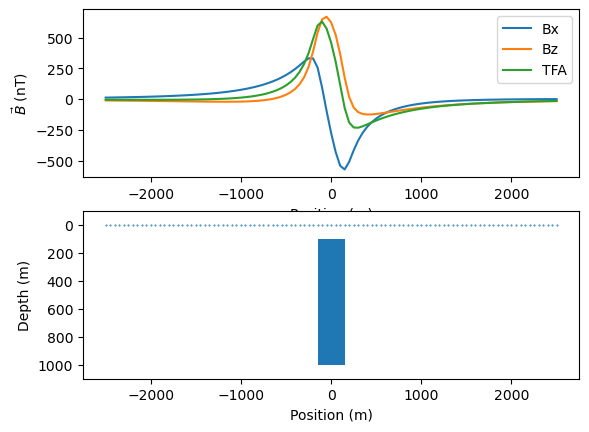

In [5]:
ax1, ax2 = plot_model(mag_dike_v, obs_dike, dike_v)